# CQPS
- 20nm notches
- CQPS constriction in the middle

\begin{equation}
H = 4E_C \left(\hat{n} - n_g \right)
\end{equation}

\begin{equation}
   \hat{H} = 4E_C(n - n_g)^2-2E_{J0}\cos(\frac{\pi\Phi}{\Phi_0})\cos \delta
\end{equation}

<img src="data/2021-02-05_cqps/extracted-plots.png"/>
<img src="data/2021-02-05_cqps/extracted-plots-1.png"/>

In [3]:
%matplotlib notebook
import logging

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("support-files/qubit.mplstyle")
from IPython.display import display
from ipywidgets import interact, interactive, interact_manual, FloatSlider, RadioButtons, Layout
import ipywidgets as widgets
from matplotlib import cm

from quantum_builder import QuantumBuilder

BASE_NAME = "/Users/CCCP/creamy_seas/monday_starts_on_saturday/qubit_simulations/data/2021-02-05_cqps"

# Twin qubit model

In [43]:
SIMULATION_PARAMETERS = {
    "states_per_loop": 7,
    "number_of_levels_to_simulate": 2
}
CQPS_TWIN_PARAMETERS = {
    "ES": 10,
    "ES_on_sides": 0,
    "inductive_loop_squares_left": 30,  # 30 140x140nm squares
    "inductive_loop_squares_right": 30,
    # Will be overriden by values below
    "EL_left": 5,
    "EL_right": 5,
    **SIMULATION_PARAMETERS
}

# Build Hamiltonian
QuantumBuilder.build_cqps_twin_qubit(
    CQPS_TWIN_PARAMETERS,
    logging_level=logging.INFO)

cqps_twin_qubit_constant_manager:122:print_constants
⮑  ⚛ System setup with the following parameters (can choose to override them):

Energies
EL_left:                                          72.05 (GHz)
EL_right:                                         72.05 (GHz)
ES:                                               10.00 (GHz)
ES_on_sides:                                      0.00 (GHz)

Raw Parameters
states_per_loop:                                  7
inductive_loop_squares_left:                      30.00 (100x100nm²)
inductive_loop_squares_right:                     30.00 (100x100nm²)




In [2]:
SIMULATION_PARAMETERS = {
    "states_per_loop": 7,
    "number_of_levels_to_simulate": 3
}
CQPS_TWIN_PARAMETERS = {
    "ES": 10,
    "ES_on_sides": 0,
    "inductive_loop_squares_left": 30,  # 30 140x140nm squares
    "inductive_loop_squares_right": 30,
    # Will be overriden by values below
    "EL_left": 5,
    "EL_right": 5,
    **SIMULATION_PARAMETERS
}

# Build Hamiltonian
cqps_tqubit = QuantumBuilder.build_cqps_twin_qubit(
    CQPS_TWIN_PARAMETERS,
    logging_level=logging.WARNING)

## TiN95_TwinQ_3Feb'21_mfield_04_data.vi 

<IPython.core.display.Javascript object>


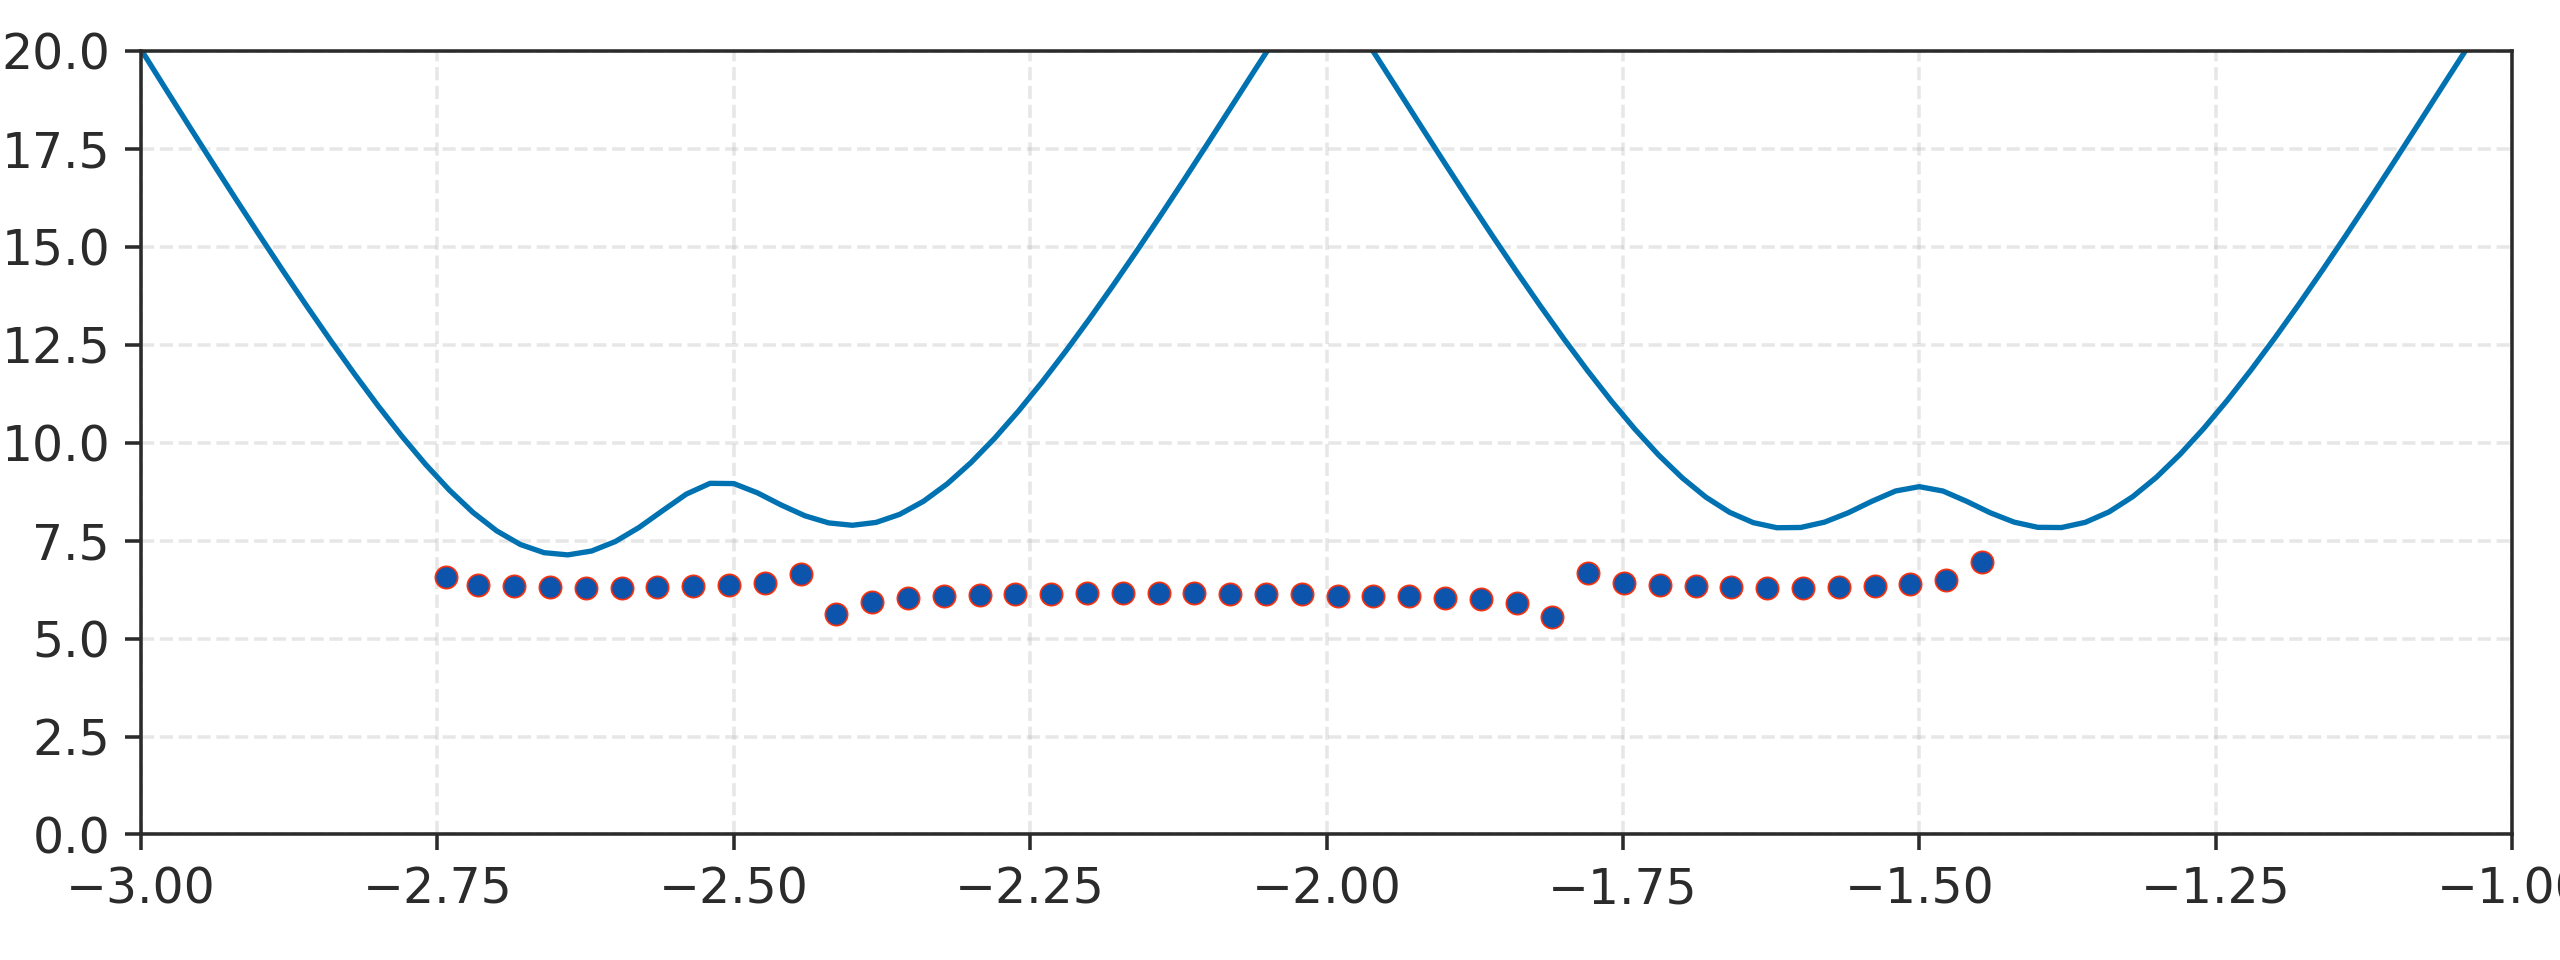

In [92]:
# Selection of data to fit
scaling = 15.1
offset = -0.4
FILE = "TiN95_TwinQ_3Feb'21_mfield_04_data"
data_series = np.loadtxt(f"{BASE_NAME}/{FILE}.txt")

EL_left = 25.6
ES = 3.2
ES_on_sides = 4.2
cqps_tqubit.override_parameters(
    EL_left=EL_left,
    EL_right=EL_left,
    ES=ES,
    ES_on_sides=ES_on_sides
)
FLUX_NUMBER = np.linspace(-3, -1, 101)

# Run simulation
simulation = cqps_tqubit.run_simulation(
    phi_dict={
        "type": "balanced",
        "phi_list": FLUX_NUMBER,
    }, number_of_levels_to_simulate=SIMULATION_PARAMETERS["number_of_levels_to_simulate"],
    use_sparse_matrix=True  # No difference to accuracy
)

# Initial plot
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
data_graph, = ax.plot(data_series[:, 0] * scaling - offset, data_series[:, 1],
                      marker="o",
                      markeredgecolor="#fb2c07",
                      markeredgewidth="0.4",
                      markersize=5,
                      alpha=0.95,
                      linestyle="")
# Double wrapped simulations since there is option to vary phi2
simulation_graph, = ax.plot(
    FLUX_NUMBER, simulation["eigvals"][:, 0, 1] -
    simulation["eigvals"][:, 0, 0],
)

plt.tight_layout()
ax.set_ylim([0, 20])
ax.set_xlim([-3, -1])

# Interactive plot
def cqps_plot(EL_left: float, EL_right: float, ES: float, ES_on_sides: float, scaling: float, offset: float):
    cqps_tqubit.override_parameters(EL_left=EL_left, EL_right=EL_right, ES=ES, ES_on_sides=ES_on_sides)
    simulation = cqps_tqubit.run_simulation(
        phi_dict={
            "type": "balanced",
            "phi_list": FLUX_NUMBER,
        }, number_of_levels_to_simulate=SIMULATION_PARAMETERS["number_of_levels_to_simulate"], use_sparse_matrix=True)
    simulation_graph.set_ydata(
        simulation["eigvals"][:, 0, 1] - simulation["eigvals"][:, 0, 0])
    data_graph.set_xdata(data_series[:, 0] * scaling - offset)


scaling_widget = FloatSlider(
    min=0, max=20, step=0.1,
    description="Scaling", value=scaling,
    layout=Layout(width='90%'),
    continuous_update=False
)
offset_widget = FloatSlider(
    min=-3, max=3, step=0.02,
    description="Offset", value=offset,
    layout=Layout(width='90%'),
    continuous_update=False
)
EL_left_widget = FloatSlider(
    min=0, max=100,
    description="EL_left (GHz)", value=EL_left,
    layout=Layout(width='90%'),
    continuous_update=False
)
EL_right_widget = FloatSlider(
    min=0, max=100,
    description="EL_right (GHz)", value=EL_left,
    layout=Layout(width='90%'),
    continuous_update=False
)
ES_widget = FloatSlider(
    min=0, max=100,
    description="ES (GHz)", value=ES,
    layout=Layout(width='90%'),
    continuous_update=False
)
ES_on_sides_widget = FloatSlider(
    min=0, max=100,
    description="ES_on_sides (GHz)", value=ES_on_sides,
    layout=Layout(width='90%'),
    continuous_update=False
)
ui = widgets.VBox([EL_left_widget, EL_right_widget, ES_widget, ES_on_sides_widget, scaling_widget, offset_widget])

In [93]:
out = widgets.interactive_output(
    cqps_plot,
    {
        # Key is the subsituted parameter, Values is the widget to use
        "EL_right": EL_right_widget,
        "EL_left": EL_left_widget,
        "ES": ES_widget,
        "ES_on_sides": ES_on_sides_widget,
        "scaling": scaling_widget,
        "offset": offset_widget
    }
)  

display(ui, out)

Output()

## TiN95_TwinQ_3Feb'21_mfield_1-2-3_comb
 
| **Series** | `ES` (GHz) | `EL` (GHz) |
|------------|------------|------------|
| A          | 7.7        | 12.9       |
| B          | NA         | NA         |
| C          | NA         | NA         |
| D          | NA         | NA         |
| E          | 6.3        | 19.4       |

<IPython.core.display.Javascript object>


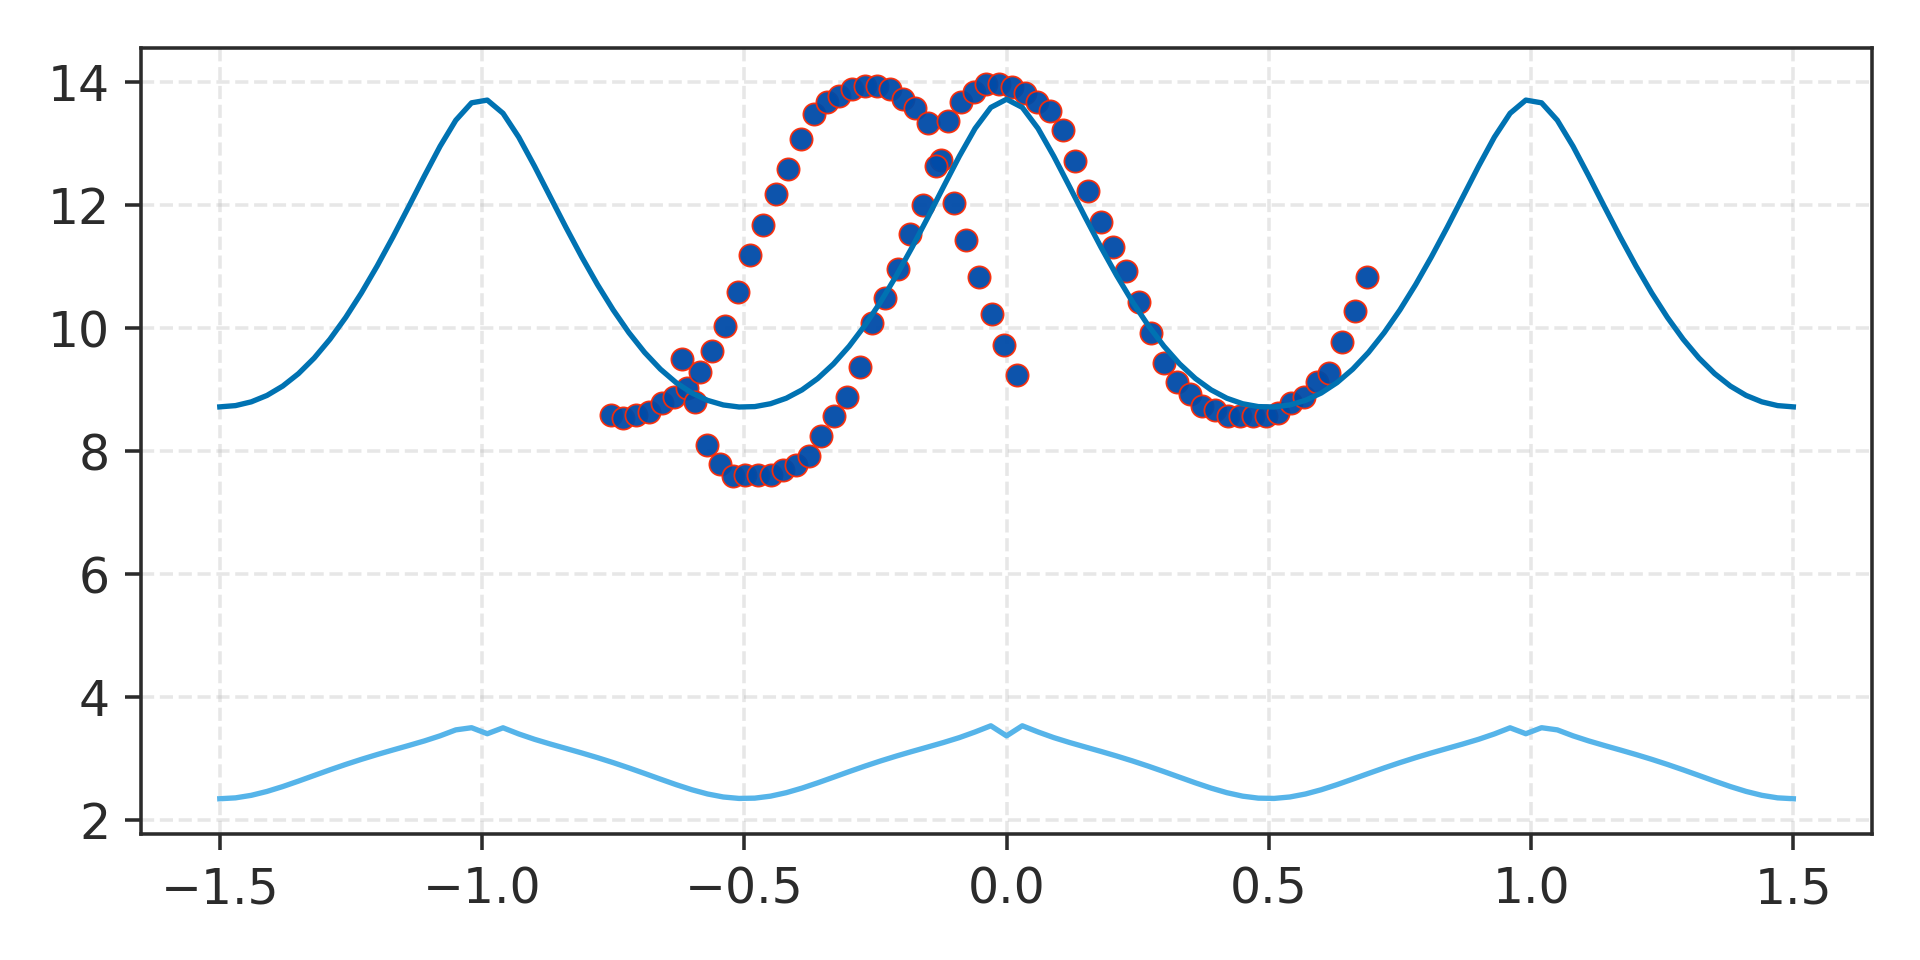

In [67]:
FILES = {
    "A": "#00147f",
    "B": "#ed2200",     # dark red (red2)
    "C": "#ffc125",      # orange,
    "D": "#8b6969",
    "E": "#cd9b1d"
}
data = {}

# Selection of data to fit
series = "A"
scaling = 4.84
offset = 1.85
FILE = "TiN95_TwinQ_3Feb'21_mfield_1-2-3_comb"
data_series = np.loadtxt(f"{BASE_NAME}/{FILE}-{series}.txt")

EL_left = 13
ES = 4.1
ES_on_sides = 7.7
cqps_tqubit.override_parameters(
    EL_left=EL_left,
    EL_right=EL_left,
    ES=ES,
    ES_on_sides=ES_on_sides
)
FLUX_NUMBER = np.linspace(-1.5, 1.5, 101)

# Run simulation
simulation = cqps_tqubit.run_simulation(
    phi_dict={
        "type": "balanced",
        "phi_list": FLUX_NUMBER,
    }, number_of_levels_to_simulate=SIMULATION_PARAMETERS["number_of_levels_to_simulate"],
    use_sparse_matrix=True  # No difference to accuracy
)

# Initial plot
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
data_graph, = ax.plot(data_series[:, 0] * scaling - offset, data_series[:, 1],
                      marker="o",
                      markeredgecolor="#fb2c07",
                      markeredgewidth="0.4",
                      markersize=5,
                      alpha=0.95,
                      linestyle="")
# Double wrapped simulations since there is option to vary phi2
simulation_graph, = ax.plot(
    FLUX_NUMBER, simulation["eigvals"][:, 0, 1] -
    simulation["eigvals"][:, 0, 0],
)

plt.tight_layout()
# ax.set_ylim([0, 10])

# Interactive plot
def cqps_plot(EL_left: float, EL_right: float, ES: float, ES_on_sides: float, scaling: float, offset: float):
    cqps_tqubit.override_parameters(EL_left=EL_left, EL_right=EL_right, ES=ES, ES_on_sides=ES_on_sides)
    simulation = cqps_tqubit.run_simulation(
        phi_dict={
            "type": "balanced",
            "phi_list": FLUX_NUMBER,
        }, number_of_levels_to_simulate=SIMULATION_PARAMETERS["number_of_levels_to_simulate"], use_sparse_matrix=True)
    simulation_graph.set_ydata(
        simulation["eigvals"][:, 0, 1] - simulation["eigvals"][:, 0, 0])
    data_graph.set_xdata(data_series[:, 0] * scaling - offset)


scaling_widget = FloatSlider(
    min=0, max=20, step=0.1,
    description="Scaling", value=scaling,
    layout=Layout(width='90%'),
    continuous_update=False
)
offset_widget = FloatSlider(
    min=-3, max=3, step=0.02,
    description="Offset", value=offset,
    layout=Layout(width='90%'),
    continuous_update=False
)
EL_left_widget = FloatSlider(
    min=0, max=100,
    description="EL_left (GHz)", value=EL_left,
    layout=Layout(width='90%'),
    continuous_update=False
)
EL_right_widget = FloatSlider(
    min=0, max=100,
    description="EL_right (GHz)", value=EL_left,
    layout=Layout(width='90%'),
    continuous_update=False
)
ES_widget = FloatSlider(
    min=0, max=100,
    description="ES (GHz)", value=ES,
    layout=Layout(width='90%'),
    continuous_update=False
)
ES_on_sides_widget = FloatSlider(
    min=0, max=100,
    description="ES_on_sides (GHz)", value=ES_on_sides,
    layout=Layout(width='90%'),
    continuous_update=False
)
ui = widgets.VBox([EL_left_widget, EL_right_widget, ES_widget, ES_on_sides_widget, scaling_widget, offset_widget])

In [39]:
out = widgets.interactive_output(
    cqps_plot,
    {
        # Key is the subsituted parameter, Values is the widget to use
        "EL_right": EL_right_widget,
        "EL_left": EL_left_widget,
        "ES": ES_widget,
        "ES_on_sides": ES_on_sides_widget,
        "scaling": scaling_widget,
        "offset": offset_widget
    }
)  

display(ui, out)

Output()

## TiN95_TwinQ_3Feb'21_mfield_05_data.vi 

<IPython.core.display.Javascript object>


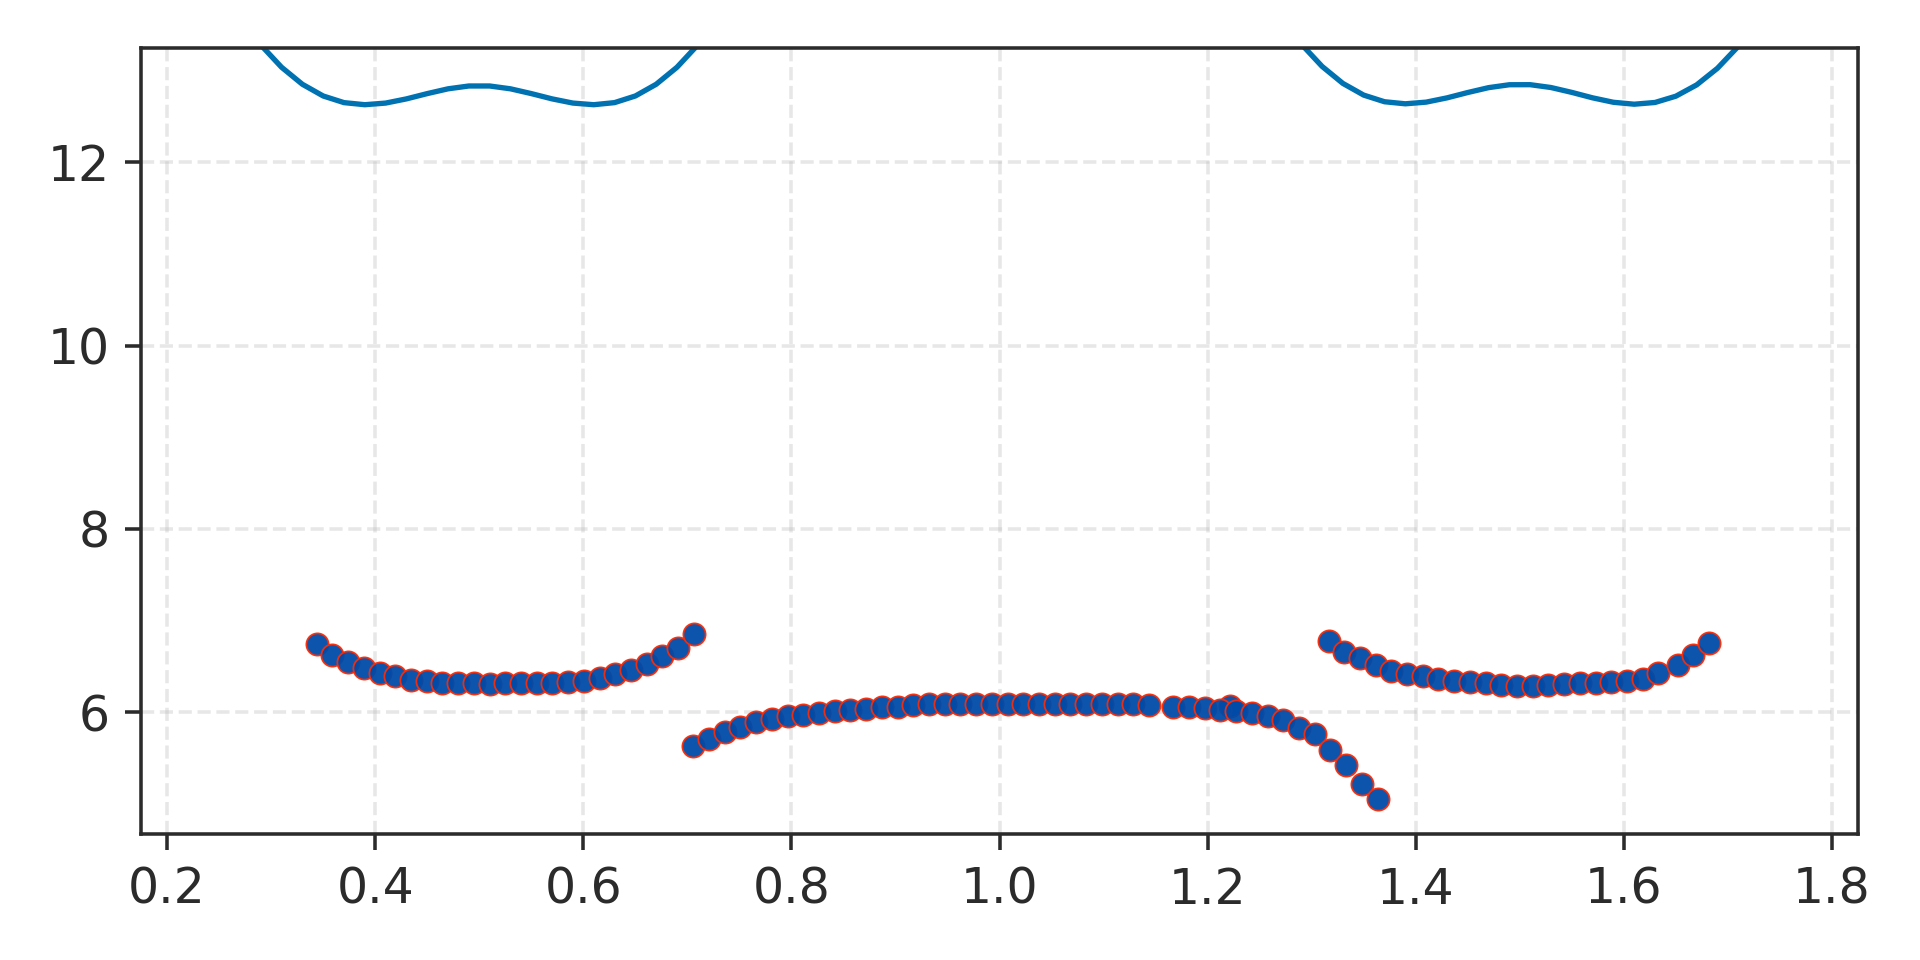

In [94]:
# Selection of data to fit
scaling = 15.1
offset = -0.4
FILE = "TiN95_TwinQ_3Feb'21_mfield_05_data"
data_series = np.loadtxt(f"{BASE_NAME}/{FILE}.txt")

EL_left = 14.2
ES = 5.7
ES_on_sides = 4.6
cqps_tqubit.override_parameters(
    EL_left=EL_left,
    EL_right=EL_left,
    ES=ES,
    ES_on_sides=ES_on_sides
)
FLUX_NUMBER = np.linspace(0.25, 1.75, 76)

# Run simulation
simulation = cqps_tqubit.run_simulation(
    phi_dict={
        "type": "balanced",
        "phi_list": FLUX_NUMBER,
    }, number_of_levels_to_simulate=2,
    use_sparse_matrix=True  # No difference to accuracy
)

# Initial plot
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
data_graph, = ax.plot(data_series[:, 0] * scaling - offset, data_series[:, 1],
                      marker="o",
                      markeredgecolor="#fb2c07",
                      markeredgewidth="0.4",
                      markersize=5,
                      alpha=0.95,
                      linestyle="")
# Double wrapped simulations since there is option to vary phi2
simulation_graph, = ax.plot(
    FLUX_NUMBER, simulation["eigvals"][:, 0, 1] -
    simulation["eigvals"][:, 0, 0],
)

plt.tight_layout()
# ax.set_ylim([0, 10])

# Interactive plot
def cqps_plot(EL_left: float, EL_right: float, ES: float, ES_on_sides: float, scaling: float, offset: float):
    cqps_tqubit.override_parameters(EL_left=EL_left, EL_right=EL_right, ES=ES, ES_on_sides=ES_on_sides)
    simulation = cqps_tqubit.run_simulation(
        phi_dict={
            "type": "balanced",
            "phi_list": FLUX_NUMBER,
        }, number_of_levels_to_simulate=SIMULATION_PARAMETERS["number_of_levels_to_simulate"], use_sparse_matrix=True)
    simulation_graph.set_ydata(
        simulation["eigvals"][:, 0, 1] - simulation["eigvals"][:, 0, 0])
    data_graph.set_xdata(data_series[:, 0] * scaling - offset)


scaling_widget = FloatSlider(
    min=0, max=20, step=0.1,
    description="Scaling", value=scaling,
    layout=Layout(width='90%'),
    continuous_update=False
)
offset_widget = FloatSlider(
    min=-3, max=3, step=0.02,
    description="Offset", value=offset,
    layout=Layout(width='90%'),
    continuous_update=False
)
EL_left_widget = FloatSlider(
    min=0, max=100,
    description="EL_left (GHz)", value=EL_left,
    layout=Layout(width='90%'),
    continuous_update=False
)
EL_right_widget = FloatSlider(
    min=0, max=100,
    description="EL_right (GHz)", value=EL_left,
    layout=Layout(width='90%'),
    continuous_update=False
)
ES_widget = FloatSlider(
    min=0, max=100,
    description="ES (GHz)", value=ES,
    layout=Layout(width='90%'),
    continuous_update=False
)
ES_on_sides_widget = FloatSlider(
    min=0, max=100,
    description="ES_on_sides (GHz)", value=ES_on_sides,
    layout=Layout(width='90%'),
    continuous_update=False
)
ui = widgets.VBox([EL_left_widget, EL_right_widget, ES_widget, ES_on_sides_widget, scaling_widget, offset_widget])

In [95]:
out = widgets.interactive_output(
    cqps_plot,
    {
        # Key is the subsituted parameter, Values is the widget to use
        "EL_right": EL_right_widget,
        "EL_left": EL_left_widget,
        "ES": ES_widget,
        "ES_on_sides": ES_on_sides_widget,
        "scaling": scaling_widget,
        "offset": offset_widget
    }
)  

display(ui, out)

Output()

# Multiple

<IPython.core.display.Javascript object>


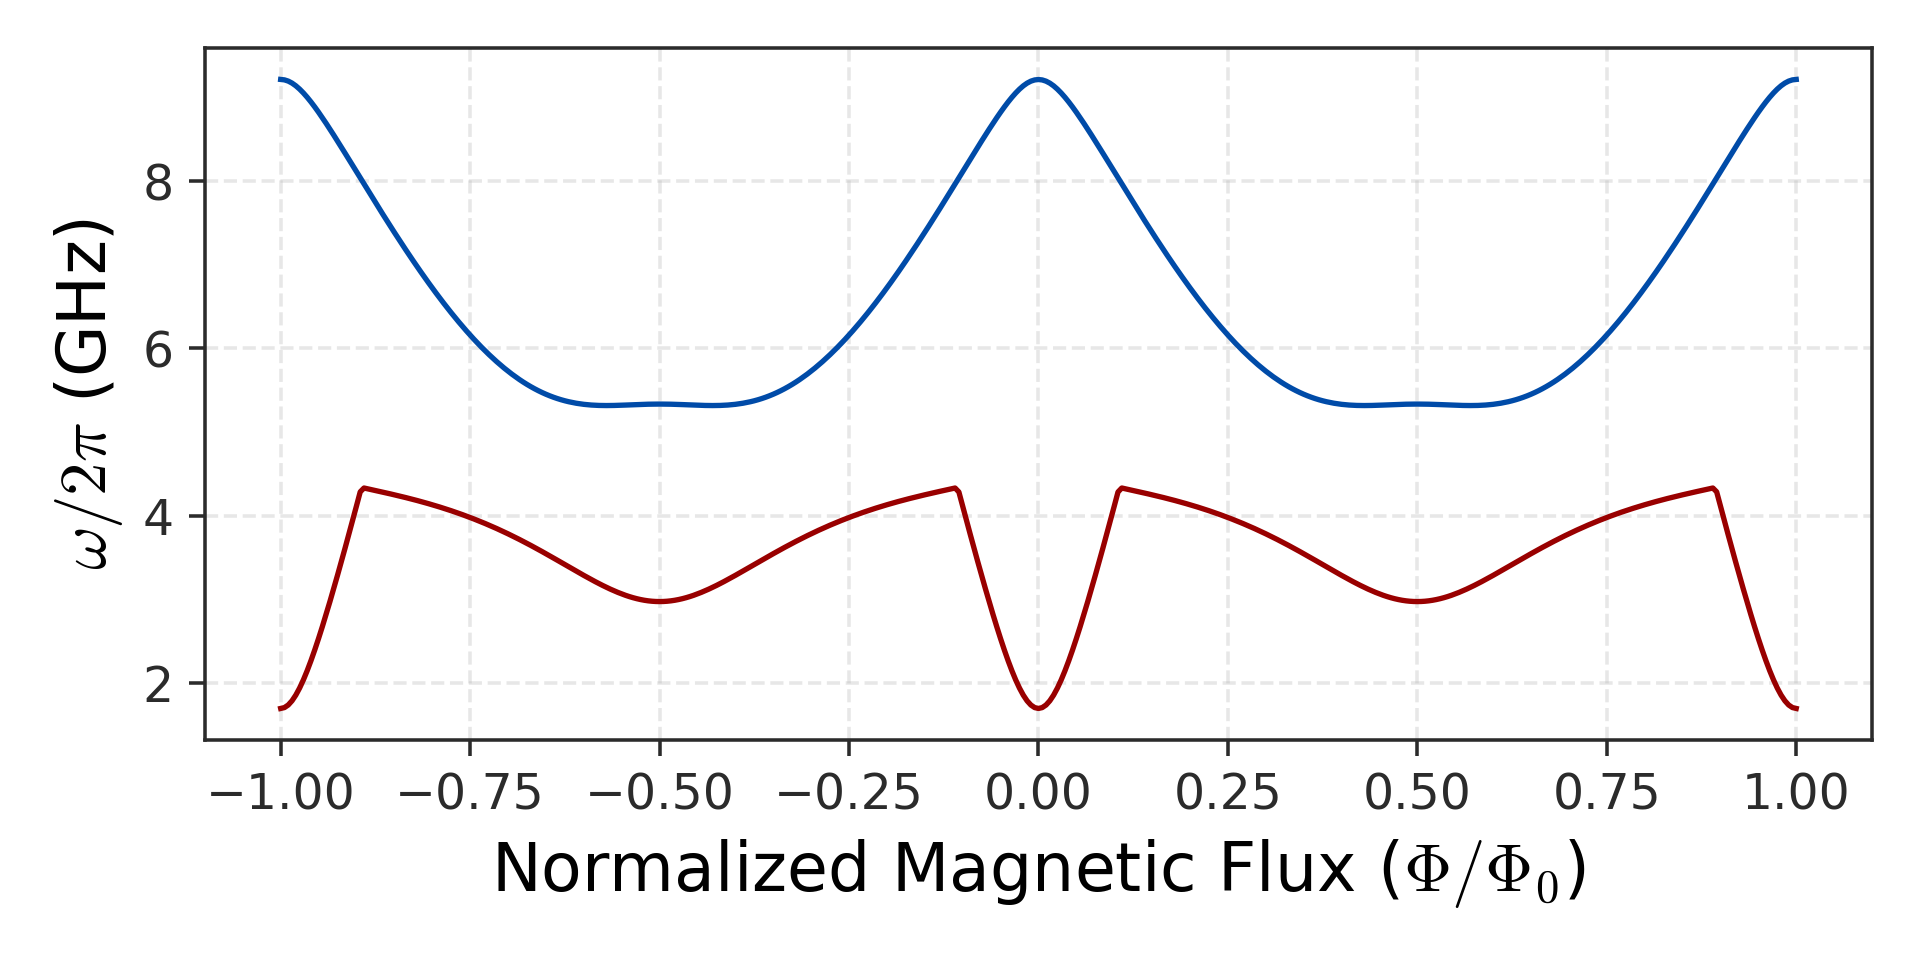

In [89]:
EL_left = 10
ES = 5
ES_on_sides = 4
cqps_tqubit.override_parameters(
    EL_left=EL_left,
    EL_right=EL_left,
    ES=ES,
    ES_on_sides=ES_on_sides
)
FLUX_NUMBER = np.linspace(-1, 1, 401)

# Run simulation
simulation = cqps_tqubit.run_simulation(
    phi_dict={
        "type": "balanced",
        "phi_list": FLUX_NUMBER,
    }, number_of_levels_to_simulate=4,
    use_sparse_matrix=True  # No difference to accuracy
)

# Initial plot
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
# Double wrapped simulations since there is option to vary phi2
simulation_graph, = ax.plot(
    FLUX_NUMBER, simulation["eigvals"][:, 0, 1] -
    simulation["eigvals"][:, 0, 0], color="C0"
)
simulation_graph, = ax.plot(
    FLUX_NUMBER, simulation["eigvals"][:, 0, 2] -
    simulation["eigvals"][:, 0, 1], color="C4"
)

ax.set_xlabel("Normalized Magnetic Flux ($\Phi/\Phi_0$)", fontsize=15)
ax.set_ylabel("$\omega/2\pi$ (GHz)", fontsize=15)    
plt.tight_layout()

plt.savefig(f"./output/2021-03_cqps/cqps_spectrum.svg", transparent=True)